In [1]:
%pylab inline
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
from skimage import data

Populating the interactive namespace from numpy and matplotlib


In [2]:
def elastic_transform(image, alpha, sigma):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
       Based on gist https://gist.github.com/erniejunior/601cdf56d2b424757de5
    """

    dx = gaussian_filter((np.random.rand(*image.shape) * 2 - 1), sigma,
                         mode="constant", cval=0) * alpha
    dy = gaussian_filter((np.random.rand(*image.shape) * 2 - 1), sigma, 
                         mode="constant", cval=0) * alpha
    
    grid = np.ogrid[0:image.shape[0], 0:image.shape[1], 0:image.shape[2]]
    x, y, z = np.broadcast_arrays(*grid)
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1)), \
                         np.reshape(z, (-1, 1))
    
    transformed_image = map_coordinates(image, indices, order=1,
                                        mode='reflect').reshape(image.shape)
    
    return transformed_image

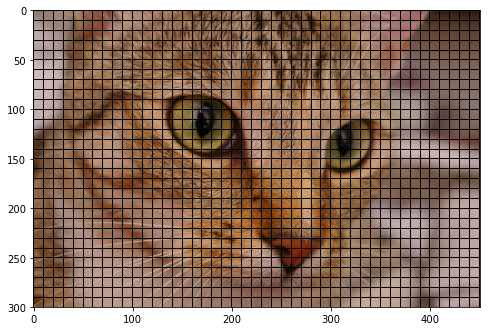

In [3]:
image = data.chelsea()
image[::10] = 1
image[:,::10] = 1
figure(figsize = (8,8))
plt.imshow(image, cmap=plt.cm.gray_r)

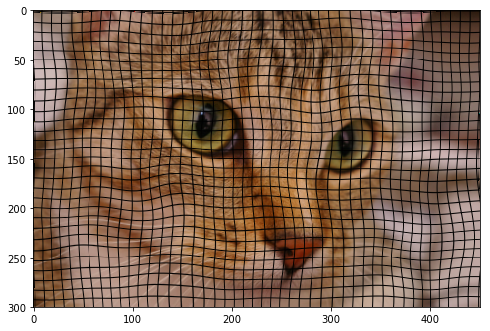

In [4]:
alpha = 8000
sigma = 20
dist_image = elastic_transform(image, alpha, sigma)
figure(figsize = (8,8))
plt.imshow(dist_image, cmap=plt.cm.gray_r)

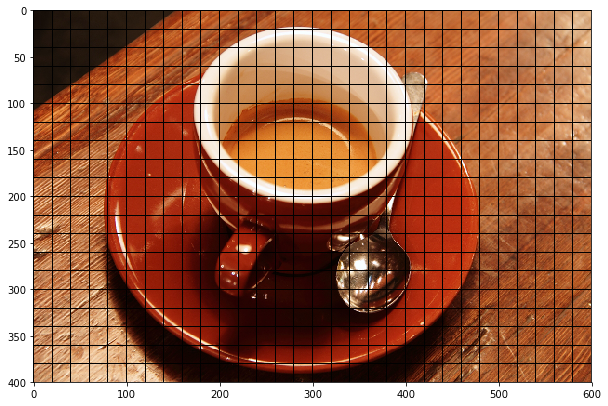

In [5]:
image = data.coffee()
image[::20] = 1
image[:,::20] = 1
figure(figsize = (10,10))
plt.imshow(image, cmap=plt.cm.gray_r)

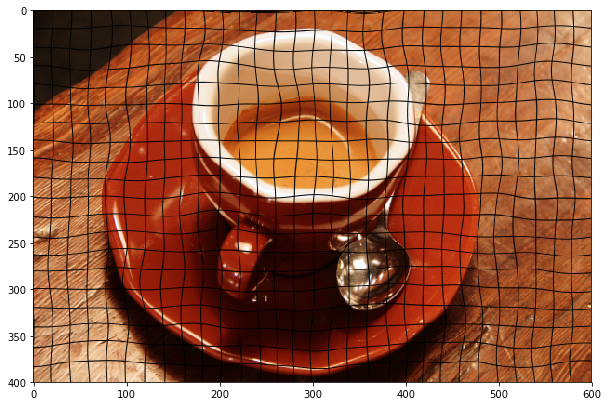

In [6]:
alpha = 8000
sigma = 20
dist_image = elastic_transform(image, alpha, sigma)
figure(figsize = (10,10))
plt.imshow(dist_image, cmap=plt.cm.gray_r)